In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Label Encoding simple
from sklearn.preprocessing import LabelEncoder
# Now quick model
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

## A. Load Data

In [2]:
# Load datasets
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

## B. Initial Data Check

In [3]:
# Display shape
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (8523, 12)
Test shape: (5681, 11)


In [4]:
# Preview data
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## C. Missing Values

In [5]:
# Missing values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

## D. Exploratory Data Analysis (EDA)

### Numerical Features

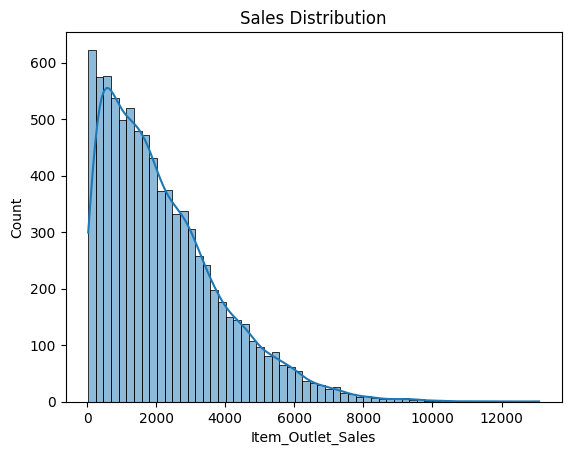

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

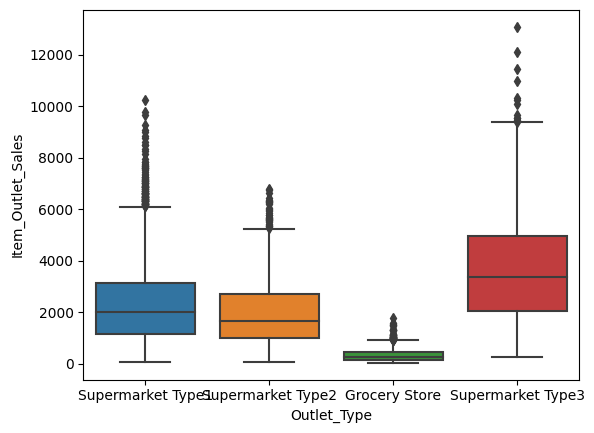

In [7]:
sns.histplot(train['Item_Outlet_Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

sns.boxplot(data=train, x='Outlet_Type', y='Item_Outlet_Sales')

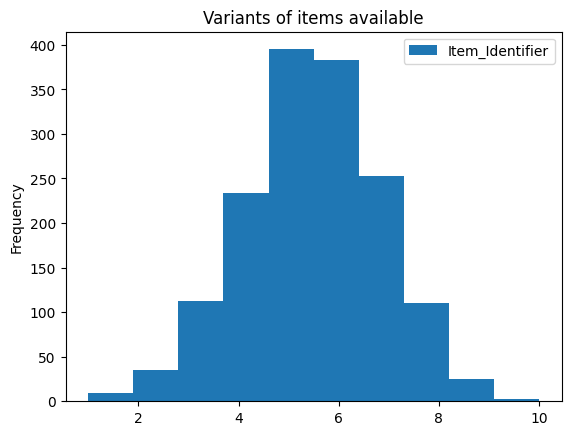

In [8]:
# We will analyze only the training set
train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Variants of items available')
plt.legend()
plt.show()

### Categorical Features

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low Fat'),
  Text(1, 0, 'Regular'),
  Text(2, 0, 'low fat'),
  Text(3, 0, 'LF'),
  Text(4, 0, 'reg')])

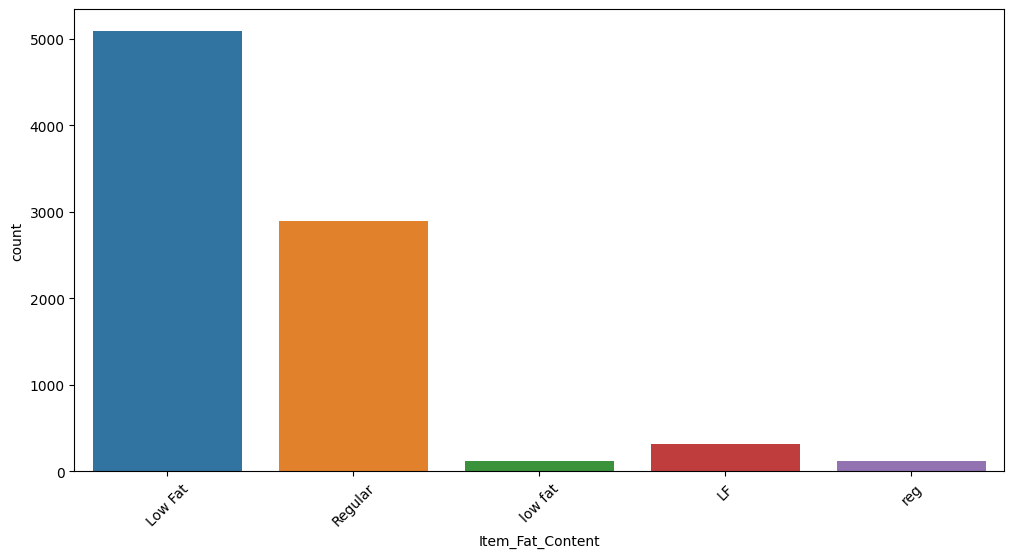

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='Item_Fat_Content', data=train)
plt.xticks(rotation=45)

In [10]:
# checking the different items in Item Type

train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

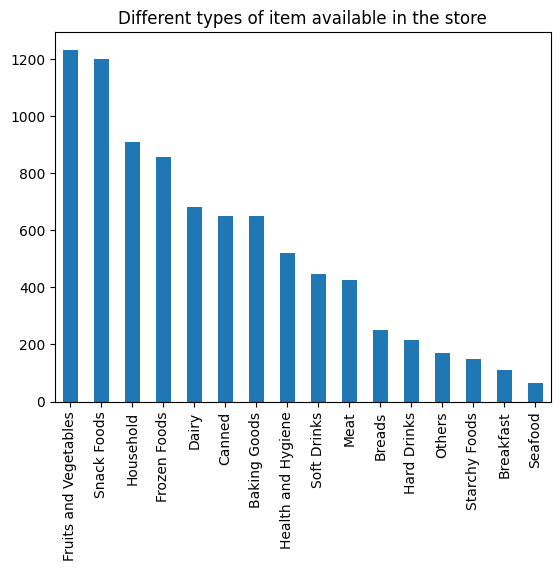

In [11]:
train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.show()

In [12]:
# checking different types of item in Outlet Type

train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

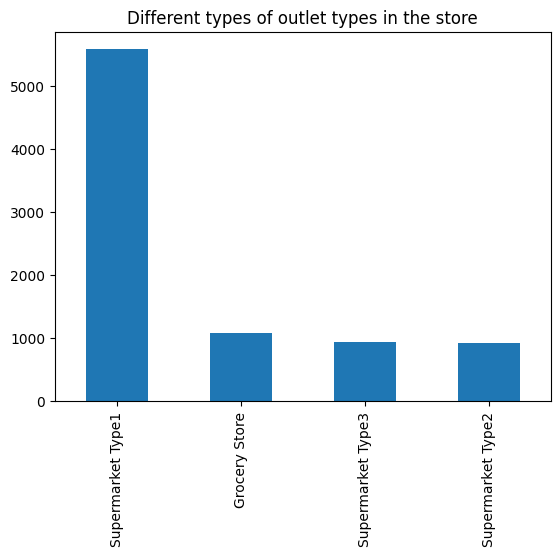

In [13]:
train['Outlet_Type'].value_counts(normalize = True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.show()

### Look at unique values in each categorical column:

In [14]:
for col in train.select_dtypes(include='object'):
    print(col, ":", train[col].unique())

Item_Identifier : ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size : ['Medium' nan 'High' 'Small']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


## E. Feature Engineering Summary

In [15]:
# combining the train and test dataset
data = pd.concat([train, test])
print(data.shape)

(14204, 12)


In [16]:
# checking unique values in the columns of train dataset
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [17]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [18]:
# imputing missing values

data['Item_Weight'] = data['Item_Weight'].replace(0, np.NaN)
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].replace(0, np.NaN)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mode()[0], inplace = True)

data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
# combining reg, Regular and Low Fat, low fat and, LF

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [20]:
# determining the operation peroid of a time

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].value_counts()

28    2439
26    1553
14    1550
16    1550
9     1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Years, dtype: int64

In [21]:
data.apply(LabelEncoder().fit_transform)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,156,284,0,1097,4,7567,9,4,1,0,1,2540,4
1,8,57,1,1436,14,632,3,8,1,2,2,422,0
2,662,376,0,1172,10,3897,9,4,1,0,1,1639,4
3,1121,393,1,0,6,5626,0,3,1,2,0,670,5
4,1297,265,0,0,9,848,1,1,0,2,1,865,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,233,298,1,718,13,3881,8,2,2,0,1,835,6
5677,308,180,1,11820,15,5069,3,8,1,2,2,835,0
5678,1426,293,0,8009,8,3196,7,5,1,1,1,835,3
5679,521,354,1,0,3,6626,2,7,1,1,1,835,1


In [22]:
# Save identifiers
item_ids = test['Item_Identifier']
outlet_ids = test['Outlet_Identifier']

In [23]:
# one hot encoding
data = pd.get_dummies(data)
print(data.shape)

(14204, 1603)


In [24]:
# splitting the data into dependent and independent variables
x = data.drop('Item_Outlet_Sales', axis = 1)
y = data.Item_Outlet_Sales

print(x.shape)
print(y.shape)

(14204, 1602)
(14204,)


In [25]:
# splitting the dataset into train and test
train = data.iloc[:8523,:]
test = data.iloc[8523:,:]

print(train.shape)
print(test.shape)

(8523, 1603)
(5681, 1603)


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9942, 1602)
(9942,)
(4262, 1602)
(4262,)


### Linear Regression

In [27]:
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)

# predicting the  test set results
y_pred = LR_model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

[3448. 1766. 1576. ... 3048.  998. 2028.]
RMSE : 1326.2419276829028
Variance score: 0.14


### AdaBoost Regressor

In [28]:
abr_model= AdaBoostRegressor(n_estimators = 100)
abr_model.fit(x_train, y_train)

# predicting the test set results
y_pred = abr_model.predict(x_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))


RMSE : 1435.1655728234127


### XgBoost Regressor

In [29]:
xbg_model = GradientBoostingRegressor()
xbg_model.fit(x_train, y_train)

# predicting the test set results
y_pred = xbg_model.predict(x_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[2766.31147463 1907.92572963 1555.96583041 ... 1929.93957659 1113.98078608
 1959.69664303]
RMSE : 1212.3018285049


### Random Forest Regression

In [30]:
rf_model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
rf_model.fit(x_train, y_train)

# predicting the  test set results
y_pred = rf_model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",rf_model.score(x_train, y_train))

[1845.391202 1487.703468 2061.090428 ... 2307.889172  999.352484
 2377.13903 ]
RMSE : 1286.2154347948415
Variance score: 0.19
Result : 0.885761134565202


### Decision Tree Regressor

In [31]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

# predicting the test set results
y_pred = dt_model.predict(x_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[ 958.752   316.9208 1907.517  ... 4653.2762  487.3656 2120.573 ]
 RMSE :  1693.1531865175546


### Support vector machine

In [32]:
svr_model = SVR()
svr_model.fit(x_train, y_train)

# predicting the x test results
y_pred = svr_model.predict(x_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

RMSE : 1598.3428241650674


In [33]:
# Predict on actual test data (from row 8523 onward)
final_predictions = xbg_model.predict(x[8523:])

# Prepare the submission dataframe
submission = pd.DataFrame({
    'Item_Identifier': item_ids,
    'Outlet_Identifier': outlet_ids,
    'Item_Outlet_Sales': final_predictions
})

# Save to CSV
submission.to_csv('../submission/submission.csv', index=False)